In [31]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline    
# %matplotlib is a magic function in IPython.

df = sns.load_dataset("diamonds")
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")
flights = sns.load_dataset("flights")

In [32]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<BarContainer object of 9 artists>

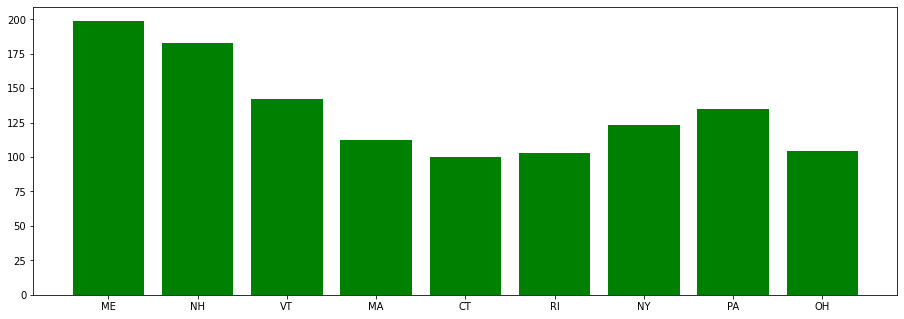

In [33]:
# Exercise data
data = {'ME': 109,
        'NH': 103,
        'VT': 112,
        'MA': 112,
        'CT': 100,
        'RI': 103,
        'NY': 137,
        'NY': 123,
        'PA': 135,
        'OH': 104,
        'ME': 199,
        'NH': 183,
        'VT': 142,}
food_illness = list(data.values())
state = list(data.keys())
state_mean = np.mean(food_illness)

fig = plt.figure(figsize = (12,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(state,food_illness, color = 'g')

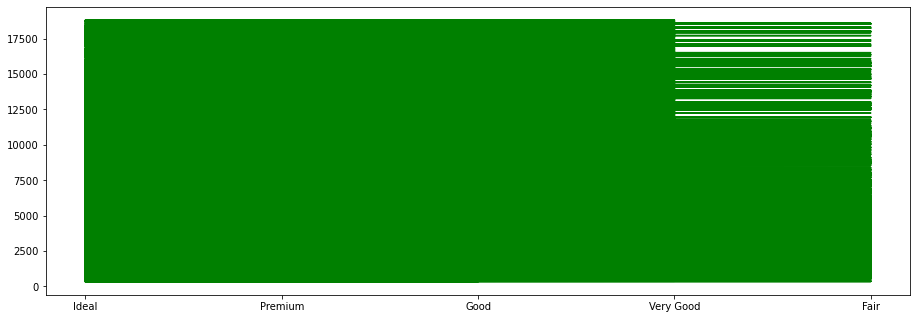

In [34]:
fig = plt.figure(figsize = (12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(df.cut,df.price, color = 'g')

# Using GroupBy with CDC data

In [35]:
import requests
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


response = requests.get("https://data.cdc.gov/resource/saz5-9hgg.json")
jsonhold = response.json()

vaccines = pd.DataFrame(jsonhold)
vaccines


,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Connecticut,2021-06-21T00:00:00.000,54360,54360
1,Maine,2021-06-21T00:00:00.000,21420,21420
2,Massachusetts,2021-06-21T00:00:00.000,104580,104580
3,New Hampshire,2021-06-21T00:00:00.000,21420,21420
4,Rhode Island,2021-06-21T00:00:00.000,17280,17280
...,...,...,...,...
995,Hawaii,2021-03-08T00:00:00.000,18720,18720
996,Nevada,2021-03-08T00:00:00.000,36270,36270
997,American Samoa,2021-03-08T00:00:00.000,0,0
998,Guam,2021-03-08T00:00:00.000,0,0


In [36]:
vaccines['month'] = pd.to_datetime(vaccines['week_of_allocations']).dt.month
vaccines['week'] =  pd.to_datetime(vaccines['week_of_allocations']).dt.week
vaccines

/var/folders/bg/jzzhjp857hv08kcqg3jdptcr0000gn/T/ipykernel_41304/1428729903.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  vaccines['week'] =  pd.to_datetime(vaccines['week_of_allocations']).dt.week


,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations,month,week
0,Connecticut,2021-06-21T00:00:00.000,54360,54360,6,25
1,Maine,2021-06-21T00:00:00.000,21420,21420,6,25
2,Massachusetts,2021-06-21T00:00:00.000,104580,104580,6,25
3,New Hampshire,2021-06-21T00:00:00.000,21420,21420,6,25
4,Rhode Island,2021-06-21T00:00:00.000,17280,17280,6,25
...,...,...,...,...,...,...
995,Hawaii,2021-03-08T00:00:00.000,18720,18720,3,10
996,Nevada,2021-03-08T00:00:00.000,36270,36270,3,10
997,American Samoa,2021-03-08T00:00:00.000,0,0,3,10
998,Guam,2021-03-08T00:00:00.000,0,0,3,10


In [37]:
# This is just to show that the qty is not numeric

vaccines.groupby('jurisdiction').sum()

,month,week
jurisdiction,,
Alabama,71,280
Alaska,68,270
American Samoa,71,280
Arizona,71,280
Arkansas,71,280
...,...,...
Virginia,71,280
Washington,68,270
West Virginia,71,280


In [38]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   jurisdiction           1000 non-null   object
 1   week_of_allocations    1000 non-null   object
 2   _1st_dose_allocations  1000 non-null   object
 3   _2nd_dose_allocations  1000 non-null   object
 4   month                  1000 non-null   int64 
 5   week                   1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [39]:
#vaccines['month'] = vaccines.month.astype(str)
#vaccines['week'] = vaccines.week.astype(str)
vaccines['_1st_dose_allocations'] = pd.to_numeric(vaccines['_1st_dose_allocations']).astype(int)
vaccines['_2nd_dose_allocations'] = pd.to_numeric(vaccines['_2nd_dose_allocations']).astype(int)
vaccines['_2nd_dose_allocations'] = vaccines._2nd_dose_allocations*1.2


short_names = {'_1st_dose_allocations':'first',
               '_2nd_dose_allocations':'second'}
vaccines.rename(columns=short_names, inplace=True)
               
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jurisdiction         1000 non-null   object 
 1   week_of_allocations  1000 non-null   object 
 2   first                1000 non-null   int64  
 3   second               1000 non-null   float64
 4   month                1000 non-null   int64  
 5   week                 1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [40]:
vaccines.jurisdiction.unique()

array(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
       'Rhode Island', 'Vermont', 'New Jersey', 'New York',
       'New York City', 'Puerto Rico', 'U.S. Virgin Islands', 'Delaware',
       'District of Columbia', 'Maryland', 'Pennsylvania', 'Philadelphia',
       'Virginia', 'West Virginia', 'Alabama', 'Florida', 'Georgia',
       'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina',
       'Tennessee', 'Chicago', 'Illinois', 'Indiana', 'Michigan',
       'Minnesota', 'Ohio', 'Wisconsin', 'Arkansas', 'Louisiana',
       'New Mexico', 'Oklahoma', 'Texas', 'Iowa', 'Kansas', 'Missouri',
       'Nebraska', 'Colorado', 'Montana', 'North Dakota', 'South Dakota',
       'Utah', 'Wyoming', 'Arizona', 'California', 'Hawaii', 'Nevada',
       'American Samoa', 'Guam', 'Marshall Islands', 'Micronesia',
       'Mariana Islands', 'Palau', 'Alaska', 'Idaho', 'Oregon',
       'Washington', 'Federal Entities'], dtype=object)

In [41]:
vaccines = vaccines[vaccines.jurisdiction.isin(['Massachusetts','New Hampshire', 'Rhode Island'])]
vaccines.shape

(48, 6)

In [42]:
vaccines.head()

,jurisdiction,week_of_allocations,first,second,month,week
2,Massachusetts,2021-06-21T00:00:00.000,104580,125496.0,6,25
3,New Hampshire,2021-06-21T00:00:00.000,21420,25704.0,6,25
4,Rhode Island,2021-06-21T00:00:00.000,17280,20736.0,6,25
65,Massachusetts,2021-06-14T00:00:00.000,104580,125496.0,6,24
66,New Hampshire,2021-06-14T00:00:00.000,21420,25704.0,6,24


## Using matplotlib

In [43]:
# We cannot.  Matplotlib does not work with dataframes.

## Using seaborn

<AxesSubplot:xlabel='month', ylabel='first'>

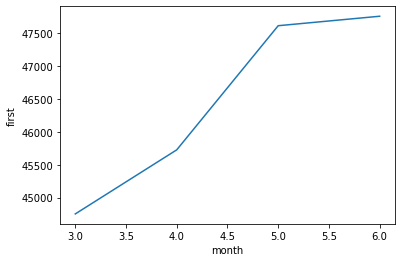

In [44]:
sns.lineplot(data=vaccines, x='month', y='first', ci = None)
# Seaborn has aggregated the data but uses mean as the aggregation

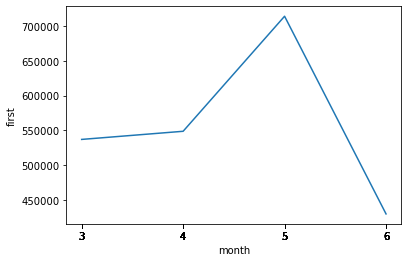

In [45]:
sns.lineplot(data=vaccines, x='month', y='first', ci = None, estimator = 'sum')
plt.xticks(vaccines.month)
plt.show()

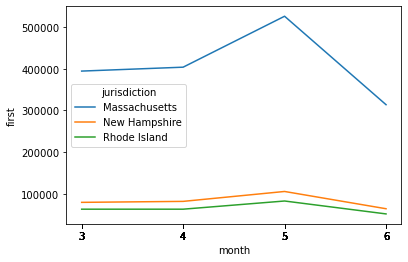

In [46]:
# Add a line for each jurisdiction
sns.lineplot(data=vaccines, x='month', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction')
plt.xticks(vaccines.month)
plt.show()

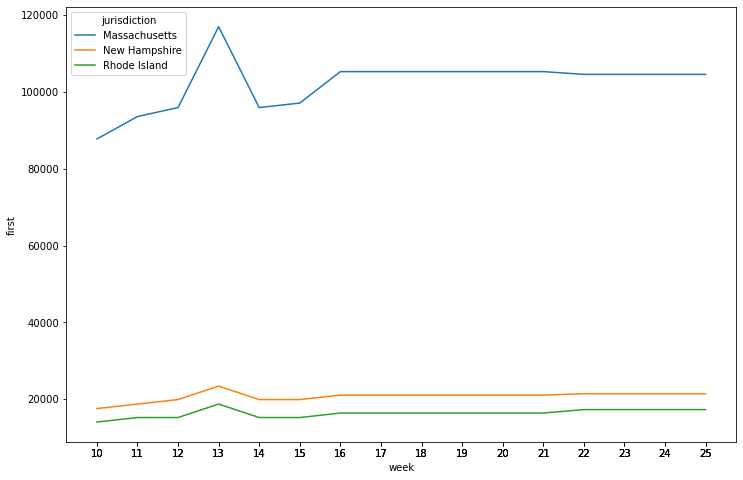

In [47]:
# Change month to week
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction')
plt.xticks(vaccines.week)
plt.show()

AttributeError: 'Line2D' object has no property 'col'

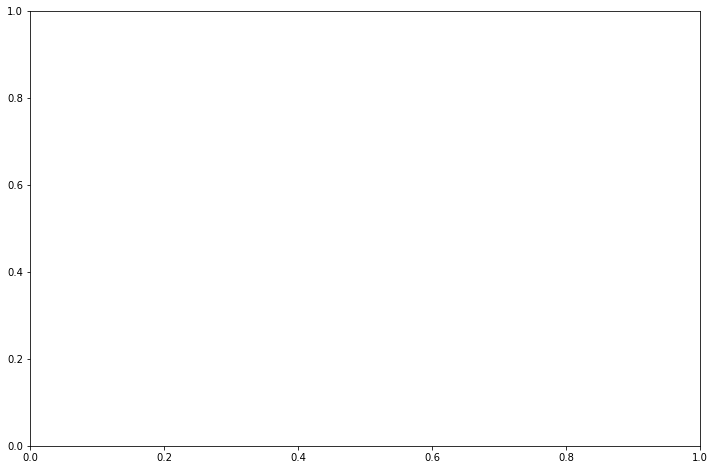

In [48]:
# Add a facetgrid
# Cannot do that with lineplot
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', hue = 'jurisdiction',col='month')
plt.xticks(vaccines.week)
plt.show()

<Figure size 864x576 with 0 Axes>

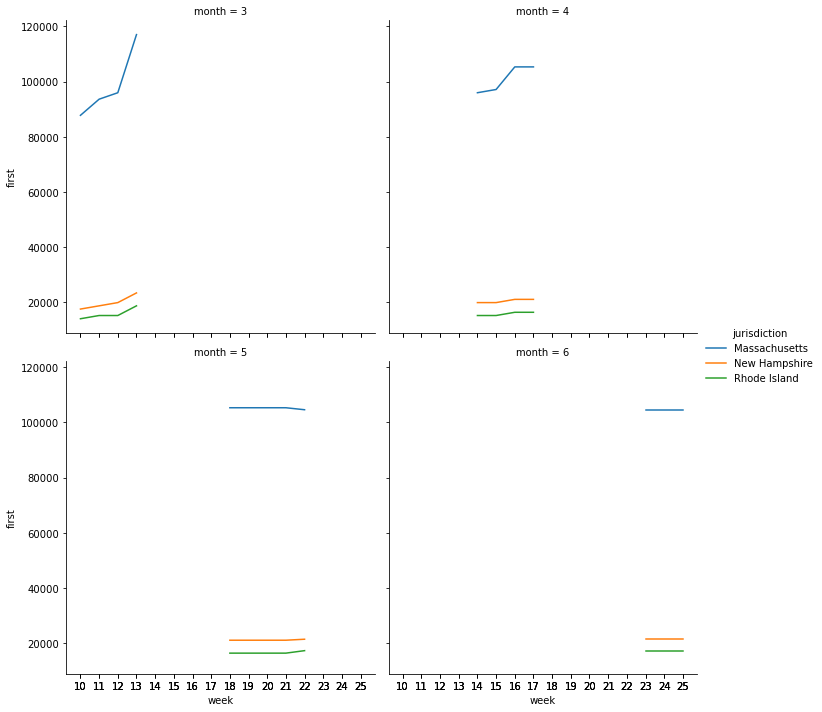

In [49]:
plt.figure(figsize=(12,8))
sns.relplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum', 
            hue = 'jurisdiction',col='month', kind = 'line',
           col_wrap = 2)
plt.xticks(vaccines.week)
plt.show()

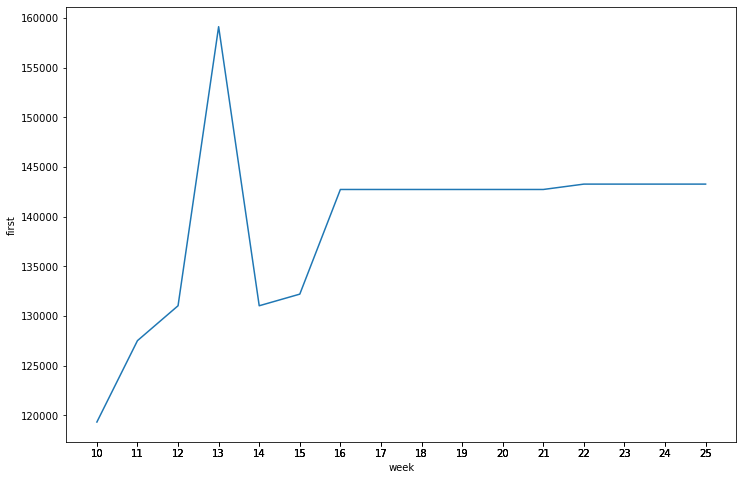

In [50]:
# Change month to week
plt.figure(figsize=(12,8))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum')
plt.xticks(vaccines.week)
plt.show()

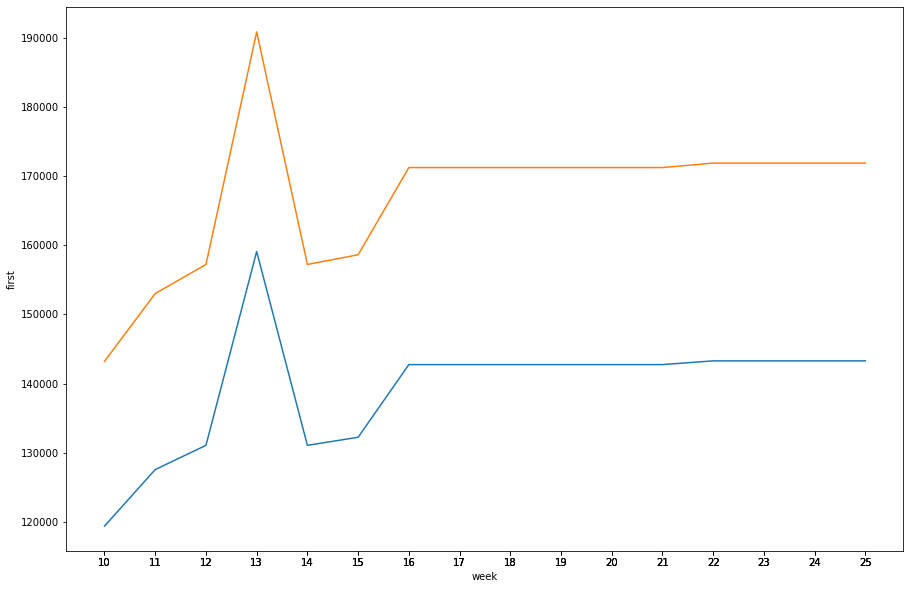

In [51]:
fig, ax1 = plt.subplots(figsize=(15, 10))
sns.lineplot(data=vaccines, x='week', y='first', ci = None, estimator = 'sum')
sns.lineplot(data=vaccines, x='week', y='second', ci = None, estimator = 'sum')
plt.xticks(vaccines.week)
plt.show()

In [52]:
vaccines.columns

Index(['jurisdiction', 'week_of_allocations', 'first', 'second', 'month',
       'week'],
      dtype='object')

In [53]:
v_long = vaccines.melt(id_vars=['jurisdiction', 'week_of_allocations','month','week'], 
                          var_name = 'allocation', value_name='dist').sort_values(by = 'jurisdiction')
v_long.head(20)

,jurisdiction,week_of_allocations,month,week,allocation,dist
0,Massachusetts,2021-06-21T00:00:00.000,6,25,first,104580.0
42,Massachusetts,2021-03-15T00:00:00.000,3,11,first,93600.0
24,Massachusetts,2021-04-26T00:00:00.000,4,17,first,105300.0
54,Massachusetts,2021-06-07T00:00:00.000,6,23,second,125496.0
27,Massachusetts,2021-04-19T00:00:00.000,4,16,first,105300.0
51,Massachusetts,2021-06-14T00:00:00.000,6,24,second,125496.0
84,Massachusetts,2021-03-29T00:00:00.000,3,13,second,140400.0
30,Massachusetts,2021-04-12T00:00:00.000,4,15,first,97110.0
78,Massachusetts,2021-04-12T00:00:00.000,4,15,second,116532.0
33,Massachusetts,2021-04-05T00:00:00.000,4,14,first,95940.0


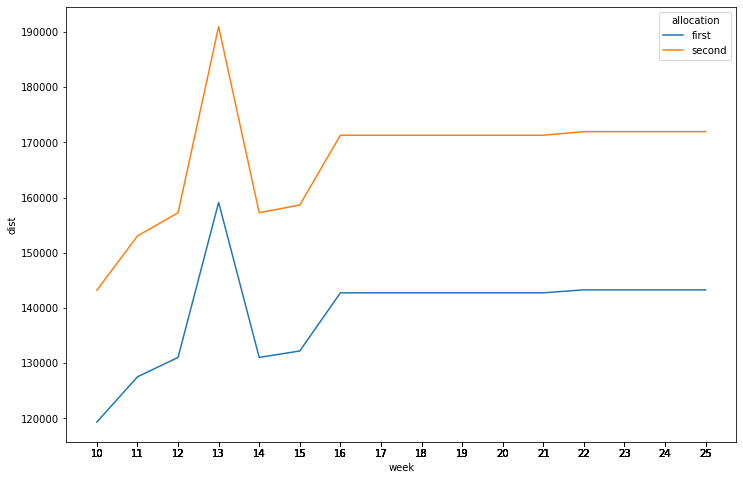

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(data=v_long, x='week', y='dist', ci = None, estimator = 'sum', hue = 'allocation')
plt.xticks(v_long.week)
plt.show()